# Data Analysis
This notebook shows some possible analysis to be done with the results of the scraping

In [26]:
import pandas as pd 
import matplotlib.pyplot as plt

news_df = pd.read_csv('../data/news.csv')
news_df.head()

,Title,Time,Theme,Header,Resume,Font
0,Compras internacionais: 9 sites vão pagar impo...,2024-07-13 14:40:12.333107,Economia,Itens de até US$ 50,Empresas receberam certificado da Receita; out...,G1
1,Paciente espera há 3 anos pelo transplante de ...,2024-07-13 04:23:12.333115,Saúde,Fila na Saúde,NaN,G1
2,Ônibus escolar com crianças cai em rio; motori...,2024-07-13 12:23:12.333117,Santa Catarina,Santa Catarina,NaN,G1
3,Motorista embriagado atropela policiais de mot...,2024-07-13 13:23:12.333118,Norte e Noroeste,Paraná,NaN,G1
4,Câmera corporal mostra tiro de PM que deixou m...,2024-07-13 15:00:12.333119,São Paulo,São Paulo,"Segundo SSP, tiro foi acidental; caso de 2023 ...",G1


## Word Cloud

Let's make a word cloud to see what are the main news of a given period

In [27]:

from wordcloud import WordCloud
# Define a set of Portuguese stopwords (partially done by GPT)
portuguese_stopwords = {
    'de', 'a', 'o', 'que', 'e', 'do', 'da', 'em', 'um', 'para', 'com',
    'não', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos',
    'como', 'mas', 'foi', 'ao', 'ele', 'das', 'tem', 'à', 'seu', 'sua',
    'ou', 'ser', 'quando', 'muito', 'há', 'nos', 'já', 'está', 'eu',
    'também', 'só', 'pelo', 'pela', 'até', 'isso', 'ela', 'entre', 'era',
    'depois', 'sem', 'mesmo', 'aos', 'ter', 'seus', 'quem', 'nas', 'me',
    'esse', 'eles', 'estão', 'você', 'tinha', 'foram', 'essa', 'num',
    'nem', 'suas', 'meu', 'às', 'minha', 'têm', 'numa', 'pelos', 'elas',
    'havia', 'seja', 'qual', 'será', 'nós', 'tenho', 'lhe', 'deles',
    'essas', 'esses', 'pelas', 'este', 'fosse', 'dele', 'tu', 'te',
    'vocês', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus',
    'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas',
    'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas',
    'isto', 'aquilo', 'estou', 'está', 'estamos', 'estão', 'estive',
    'esteve', 'estivemos', 'estiveram', 'estava', 'estávamos', 'estavam',
    'estivera', 'estivéramos', 'esteja', 'estejamos', 'estejam',
    'estivesse', 'estivéssemos', 'estivessem', 'estiver', 'estivermos',
    'estiverem', 'hei', 'há', 'havemos', 'hão', 'houve', 'houvemos',
    'houveram', 'houvera', 'houvéramos', 'haja', 'hajamos', 'hajam',
    'houvesse', 'houvéssemos', 'houvessem', 'houver', 'houvermos',
    'houverem', 'houverei', 'houverá', 'houveremos', 'houverão',
    'houveria', 'houveríamos', 'houveriam', 'sou', 'somos', 'são',
    'era', 'éramos', 'eram', 'fui', 'foi', 'fomos', 'foram', 'fora',
    'fôramos', 'seja', 'sejamos', 'sejam', 'fosse', 'fôssemos',
    'fossem', 'for', 'formos', 'forem', 'serei', 'será', 'seremos',
    'serão', 'seria', 'seríamos', 'seriam', 'tenho', 'tem', 'temos',
    'tém', 'tinha', 'tínhamos', 'tinham', 'tive', 'teve', 'tivemos',
    'tiveram', 'tivera', 'tivéramos', 'tenha', 'tenhamos', 'tenham',
    'tivesse', 'tivéssemos', 'tivessem', 'tiver', 'tivermos', 'tiverem',
    'terei', 'terá', 'teremos', 'terão', 'teria', 'teríamos', 'teriam', 'diz', 'é', 
    'após', 'sobre', 'veja', 'entenda', 'R'
}


In [28]:
def plot_wordcloud(news_titles):
    text = ' '.join(news_titles)
    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=portuguese_stopwords).generate(text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Hide the axes
    
    
def generate_wordcloud(news_df: pd.DataFrame, initial_date = None, finish_date = None):
    if initial_date is not None:
        news_df = news_df[news_df['Time'] >= initial_date]
    if finish_date is not None:
        news_df = news_df[news_df['Time'] <= finish_date]
        
    plot_wordcloud(news_df['Title'])

Text(0.5, 1.0, 'WordCloud for the news of 11/07/2024')

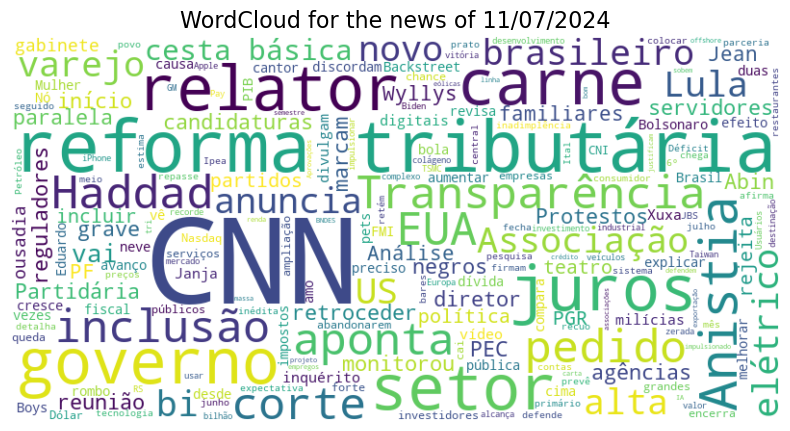

In [30]:
generate_wordcloud(news_df, initial_date='2024-07-11', finish_date='2024-07-12')
plt.title("WordCloud for the news of 11/07/2024", fontsize=16)

Text(0.5, 1.0, 'WordCloud for the news of 12/07/2024')

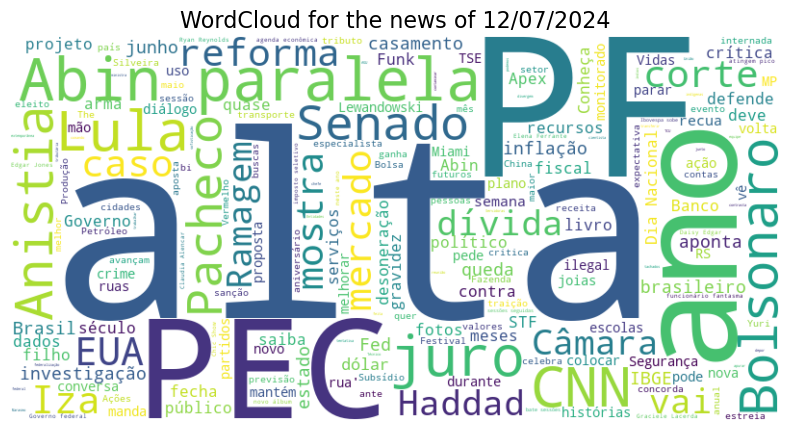

In [31]:
generate_wordcloud(news_df, initial_date='2024-07-12', finish_date='2024-07-13')
plt.title("WordCloud for the news of 12/07/2024", fontsize=16)